#### Check out the Notion for more Information ####
Notion page -> https://www.notion.so/Essence_of_Healthy_Stocks-18e0b9858ca88059afd2f08c9cd8e61f?pvs=4

This is the second process of the study !!!!

In [55]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date
import matplotlib as plt
from IPython.display import Image
from lib import functions


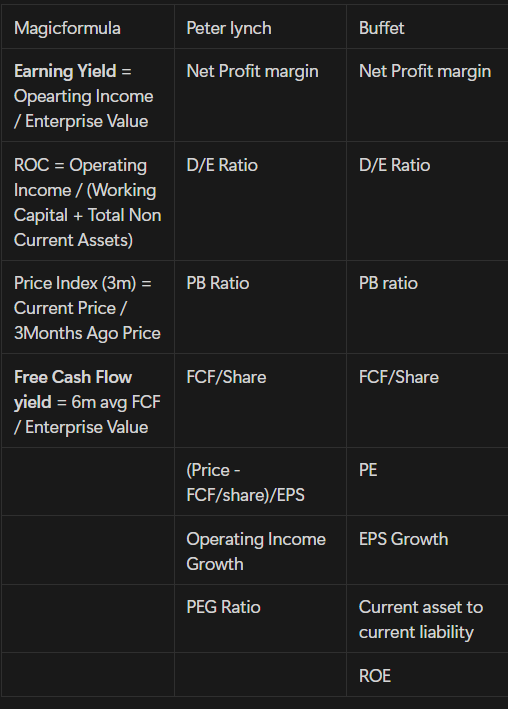

In [56]:
Image(filename='{6B164E19-AB08-4ECC-ADDC-80A486956487}.png')
## Here I categorize tasks into two groups ##
### 1) Common Indicators with No calculation  which are NPM, D/E Ratio, PB Ratio, PE Ratio and FCF/share. In addition, I need to scrap some basic information for the second task calculation as well.
### 2) Indicators with calculation which are the remainings.


In [57]:
### Firstly, let me build up a list of tickers ####
list_stock_th = pd.read_excel('list_tickers/stock_info_th.xlsx', sheet_name='listedCompanies_th_TH',skiprows=1)
df_list_stock_th = pd.DataFrame(list_stock_th['หลักทรัพย์'].astype('str') + '.bk')
df_list_stock_th['market'] = list_stock_th['ตลาด']
df_list_stock_th = df_list_stock_th.rename(columns={'หลักทรัพย์' : 'ticker'})
df_list_stock_th = df_list_stock_th.reset_index(drop=True)

list_stock_sp500 = pd.read_csv('list_tickers/stock_info_s&p500.csv')
df_list_stock_sp500 = pd.DataFrame(list_stock_sp500['Symbol'].astype('str'))
df_list_stock_sp500 = df_list_stock_sp500.rename(columns={'Symbol' : 'ticker'})
df_list_stock_sp500 = df_list_stock_sp500.drop_duplicates()

list_stock_us1 = pd.read_csv('list_tickers/stock_info_us_1.csv')
list_stock_us2 = pd.read_csv('list_tickers/stock_info_us_2.csv')

df_list_stock_us1 = pd.DataFrame(list_stock_us1['Symbol'].astype('str'))
df_list_stock_us = pd.concat([df_list_stock_us1,list_stock_us2['Symbol'].astype('str')])
df_list_stock_us = df_list_stock_us.rename(columns={'Symbol' : 'ticker'})
df_list_stock_us = df_list_stock_us.drop_duplicates()

df_list_stock_us_all = pd.concat([df_list_stock_sp500,df_list_stock_us])
df_list_stock_us_all['market'] = 'US'
df_list_stock_us_all = df_list_stock_us_all.drop_duplicates()
df_list_stock_us_all = df_list_stock_us_all.reset_index(drop=True)

df_list_stock = pd.concat([df_list_stock_th,df_list_stock_us_all])
df_list_stock = df_list_stock.reset_index(drop=True)



## For the sake of study, I filter out and take only stock in SET ##

df_list_stock = df_list_stock.loc[df_list_stock['market'] == "SET"]
df_list_stock = df_list_stock.reset_index(drop=True)
# df_list_stock = df_list_stock[:20]
print(df_list_stock)

        ticker market
0        2S.bk    SET
1     3BBIF.bk    SET
2    3K-BAT.bk    SET
3         A.bk    SET
4       AAI.bk    SET
..         ...    ...
694      WP.bk    SET
695     WPH.bk    SET
696     XPG.bk    SET
697     ZAA.bk    SET
698     ZEN.bk    SET

[699 rows x 2 columns]


In [58]:
#### Now, we begin task1 ####

# 1st pulling date for this data #
df_list_stock['date_pulling'] = date.today()
# 2nd acquiring information from .info #
info_attribute_list = [
    'industry',
    'sector',
    'enterpriseValue',
    'totalCashPerShare',
    'profitMargins',
    # 'trailingPE',
    # 'beta',
    # 'sharesOutstanding',
    'priceToBook',
    'debtToEquity',
    'returnOnEquity',
    'currentRatio',
    # 'trailingPegRatio',
    # 'currentPrice',
    'trailingEps'
]
# 3rd acquiring information from .quarterly_balance_sheet #
balancesheet_list = [
    'Total Non Current Assets',
    'Working Capital'
]
# 4th acquiring information from .quarterly_financials #
ttm = 4
financials_list = [
    # 'EBIT',
    'Operating Income'
]

# 5th acquiring information from .quarterly_cash_flow #
ttm = 4
cashflow_list = [
    'Free Cash Flow'
]

In [59]:
info_attribute_list_buffer = []
balancesheet_list_buffer = []
financials_list_buffer = []
cashflow_list_buffer = []
normalised_OI_index_list_buffer = []
average_MF_ROC_list_buffer = []
pricerelated_list_bugger = []

In [60]:
# 1st pulling date for this data #
df_list_stock['date_pulling'] = date.today()

for i in range(len(df_list_stock)) :
    print(i, "/", len(df_list_stock)-1 ,df_list_stock['ticker'][i])
    yfticker = yf.Ticker(df_list_stock['ticker'][i])
    # 2nd acquiring information from .info #
    info_attribute_list_buffer_r = []
    for j in range(len(info_attribute_list)):
        try:
            info_attribute_list_buffer_r.append(yfticker.info[info_attribute_list[j]])
        except:
            info_attribute_list_buffer_r.append(None)
    info_attribute_list_buffer.append(info_attribute_list_buffer_r)

    # 3rd acquiring information from .balancesheet #
    balancesheet_list_buffer_r = []
    for j in range(len(balancesheet_list)):
        try:
            balancesheet_list_buffer_r.append(yfticker.quarterly_balance_sheet.loc[yfticker.quarterly_balance_sheet.index == balancesheet_list[j]].values[0][0])
        except:
            balancesheet_list_buffer_r.append(None)
    balancesheet_list_buffer.append(balancesheet_list_buffer_r)

    # 4th acquiring information from .quarterly_financials #
    financials_list_buffer_r = []
    for j in range(len(financials_list)):
        try:
            financials_list_buffer_r.append(np.array([yfticker.quarterly_financials.loc[yfticker.quarterly_financials.index == financials_list[j]].values[0][i] for i in range(ttm)]).sum())
        except:
            financials_list_buffer_r.append(None)
    try:
        financials_list_buffer_r.append(yfticker.quarterly_financials.columns[0])
    except:
        financials_list_buffer_r.append(None)
    financials_list_buffer.append(financials_list_buffer_r)

    # 5th acquiring information from .quarterly_cashflow #
    cashflow_list_buffer_r = []
    for j in range(len(cashflow_list)):
        try:
            cashflow_list_buffer_r.append(np.array([yfticker.quarterly_cashflow.loc[yfticker.quarterly_cashflow.index == cashflow_list[j]].values[0][i] for i in range(ttm)]).mean())
        except:
            cashflow_list_buffer_r.append(None)

    cashflow_list_buffer.append(cashflow_list_buffer_r)

    # ### get normalised_OI_index_list_buffer ####
    # normalised_OI_index_list_r = []
    # try:
    #     beta , numofyear = functions.yfinance_normalised_OI_index(df_list_stock['ticker'][i],'Operating Income')
    #     normalised_OI_index_list_r.append(beta)
    #     # normalised_OI_index_list_r.append(numofyear)
    # except:
    #     normalised_OI_index_list_r.append(None)
    #     # normalised_OI_index_list_r.append(None)       
    # normalised_OI_index_list_buffer.append(normalised_OI_index_list_r)
    
    ### get average_MF_ROC_list_buffer ####
    average_MF_ROC_list_r = []
    try:
        avg_mf_roc,avg_growth = functions.yfinance_average_ROI(df_list_stock['ticker'][i],'Operating Income')
        average_MF_ROC_list_r.append(avg_mf_roc)
        average_MF_ROC_list_r.append(avg_growth)
    except:
        average_MF_ROC_list_r.append(None)
        average_MF_ROC_list_r.append(None)

    average_MF_ROC_list_buffer.append(average_MF_ROC_list_r)

    #### Get indicators based on price #####
    if (df_list_stock['market'][i] == 'SET'):
        market = "^SET.bk"
    elif (df_list_stock['market'][i] == 'mai') :
        market = "^SET.bk"
    elif (df_list_stock['market'][i] == 'US') :
        market = "^GSPC"      
    else : market = "^GSPC" 
    pricerelated_list_bugger_r = []
    try:
        date_end = date.today()
        month_backward = -3
        date_start = functions.add_months(date_end, month_backward)
        beta, price_current, price_past = functions.finding_beta(market,df_list_stock['ticker'][i],date_start,date_end)
        pricerelated_list_bugger_r.append(beta)
        pricerelated_list_bugger_r.append(price_current)
        pricerelated_list_bugger_r.append(price_past)
    except:
        pricerelated_list_bugger_r.append(None)
        pricerelated_list_bugger_r.append(None)
        pricerelated_list_bugger_r.append(None)
    pricerelated_list_bugger.append(pricerelated_list_bugger_r)


financials_list.append('ttm_latest')
df_list_stock = df_list_stock.join(pd.DataFrame(info_attribute_list_buffer, columns=info_attribute_list))
df_list_stock = df_list_stock.join(pd.DataFrame(balancesheet_list_buffer, columns=balancesheet_list))
df_list_stock = df_list_stock.join(pd.DataFrame(financials_list_buffer, columns=financials_list))
df_list_stock = df_list_stock.join(pd.DataFrame(cashflow_list_buffer, columns=cashflow_list))
# df_list_stock = df_list_stock.join(pd.DataFrame(normalised_OI_index_list_buffer, columns=['beta_earnings']))
df_list_stock = df_list_stock.join(pd.DataFrame(average_MF_ROC_list_buffer, columns=['avg_MF_ROC','avg_growth']))
df_list_stock = df_list_stock.join(pd.DataFrame(pricerelated_list_bugger, columns=['beta','price_current','price_past']))

#### Drop NAN #############
df_list_stock = df_list_stock.dropna()
## we could notice that bakning/financial stocks would be filtered out since there accounting method is not the same as others 

##### Drop where marketcap and EBIT < 0#############
# df_list_stock = df_list_stock.loc[df_list_stock['marketCap'] > 0]
# df_list_stock = df_list_stock.loc[df_list_stock['EBIT'] >0]
# df_list_stock = df_list_stock.loc[df_list_stock['Operating Income'] >0]

# sectortoexclude =['Financial Services','Utilities','Energy']
# for i in sectortoexclude:
#     try:
#         df_list_stock = df_list_stock.loc[df_list_stock['sector'] != i]
#     except:
#         None
df_list_stock = df_list_stock.reset_index(drop=True)


#### Now, we begin task2 ####
df_list_stock = df_list_stock.loc[df_list_stock['enterpriseValue'] != 0]
df_list_stock['MF_EarningYield'] = df_list_stock['Operating Income'] / df_list_stock['enterpriseValue']

df_list_stock['current_MF_ROC'] = df_list_stock['Operating Income'] / (df_list_stock['Working Capital'] + df_list_stock['Total Non Current Assets'])

df_list_stock['FCF_Yield'] = df_list_stock['Free Cash Flow'] / df_list_stock['enterpriseValue']

df_list_stock['PE_offset_Cash'] = (df_list_stock['price_current'] - df_list_stock['totalCashPerShare']) / df_list_stock['trailingEps']

df_list_stock['PE'] = (df_list_stock['price_current']) / df_list_stock['trailingEps']
df_list_stock['PEG'] = df_list_stock['PE']/ df_list_stock['avg_growth']

df_list_stock['PriceIndex_3m'] = df_list_stock['price_current']/df_list_stock['price_past']
df_list_stock['percenFCFpersharetoprice'] = (df_list_stock['totalCashPerShare'])/df_list_stock['price_current']



#### Unrelated columns #### 
df_list_stock = df_list_stock.drop(columns=['enterpriseValue','Total Non Current Assets','Working Capital','Operating Income','Free Cash Flow','totalCashPerShare','ttm_latest','price_current','price_past'])

df_list_stock.to_csv('df_list_stock.csv',index= False)

0 / 698 2S.bk
1 / 698 3BBIF.bk
2 / 698 3K-BAT.bk
3 / 698 A.bk
4 / 698 AAI.bk
5 / 698 AAV.bk
6 / 698 ACC.bk
7 / 698 ACE.bk
8 / 698 ACG.bk
9 / 698 ADVANC.bk
10 / 698 ADVICE.bk
11 / 698 AE.bk
12 / 698 AEONTS.bk
13 / 698 AFC.bk
14 / 698 AGE.bk
15 / 698 AH.bk
16 / 698 AHC.bk
17 / 698 AI.bk
18 / 698 AIE.bk
19 / 698 AIMCG.bk
20 / 698 AIMIRT.bk
21 / 698 AIT.bk
22 / 698 AJ.bk
23 / 698 AJA.bk
24 / 698 AKR.bk
25 / 698 AKS.bk
26 / 698 ALLA.bk
27 / 698 ALLY.bk
28 / 698 ALT.bk
29 / 698 ALUCON.bk
30 / 698 AMANAH.bk
31 / 698 AMARIN.bk
32 / 698 AMATA.bk
33 / 698 AMATAR.bk
34 / 698 AMATAV.bk
35 / 698 AMC.bk
36 / 698 AMR.bk
37 / 698 ANAN.bk
38 / 698 ANI.bk
39 / 698 AOT.bk
40 / 698 AP.bk
41 / 698 APCO.bk
42 / 698 APCS.bk
43 / 698 APEX.bk


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/APEX.BK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=APEX.BK&crumb=focGgova3IT
$APEX.BK: possibly delisted; no timezone found


44 / 698 APURE.bk
45 / 698 AQUA.bk
46 / 698 AS.bk
47 / 698 ASAP.bk
48 / 698 ASEFA.bk
49 / 698 ASIA.bk
50 / 698 ASIAN.bk
51 / 698 ASIMAR.bk
52 / 698 ASK.bk
53 / 698 ASP.bk
54 / 698 ASW.bk
55 / 698 AURA.bk
56 / 698 AWC.bk
57 / 698 AYUD.bk
58 / 698 B.bk
59 / 698 B52.bk
60 / 698 BA.bk
61 / 698 BAFS.bk
62 / 698 BAM.bk
63 / 698 BANPU.bk
64 / 698 BAREIT.bk
65 / 698 BAY.bk
66 / 698 BBGI.bk
67 / 698 BBL.bk
68 / 698 BCH.bk
69 / 698 BCP.bk
70 / 698 BCPG.bk
71 / 698 BCT.bk
72 / 698 BDMS.bk
73 / 698 BEAUTY.bk
74 / 698 BEC.bk
75 / 698 BEM.bk
76 / 698 BEYOND.bk
77 / 698 BGC.bk
78 / 698 BGRIM.bk
79 / 698 BH.bk
80 / 698 BIG.bk
81 / 698 BIOTEC.bk
82 / 698 BIZ.bk
83 / 698 BJC.bk
84 / 698 BJCHI.bk
85 / 698 BKD.bk
86 / 698 BKGI.bk
87 / 698 BKIH.bk
88 / 698 BKKCP.bk
89 / 698 BLA.bk
90 / 698 BLAND.bk
91 / 698 BLC.bk
92 / 698 BLISS.bk
93 / 698 BOFFICE.bk
94 / 698 BPP.bk
95 / 698 BR.bk
96 / 698 BRI.bk
97 / 698 BROCK.bk
98 / 698 BRR.bk
99 / 698 BRRGIF.bk
100 / 698 BSBM.bk
101 / 698 BSRC.bk
102 / 698 BTG.bk
103 

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SBNEXT.BK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SBNEXT.BK&crumb=focGgova3IT
$SBNEXT.BK: possibly delisted; no timezone found


482 / 698 SC.bk
483 / 698 SCAP.bk
484 / 698 SCB.bk
485 / 698 SCC.bk
486 / 698 SCCC.bk
487 / 698 SCG.bk
488 / 698 SCGD.bk
489 / 698 SCGP.bk
490 / 698 SCI.bk
491 / 698 SCM.bk
492 / 698 SCN.bk
493 / 698 SCP.bk
494 / 698 SDC.bk
495 / 698 SE.bk
496 / 698 SEAFCO.bk
497 / 698 SEAOIL.bk
498 / 698 SE-ED.bk
499 / 698 SENA.bk
500 / 698 SFLEX.bk
501 / 698 SGC.bk
502 / 698 SGP.bk
503 / 698 SHANG.bk
504 / 698 SHR.bk
505 / 698 SIAM.bk
506 / 698 SINGER.bk
507 / 698 SINO.bk
508 / 698 SIRI.bk
509 / 698 SIRIP.bk
510 / 698 SIS.bk
511 / 698 SISB.bk
512 / 698 SITHAI.bk
513 / 698 SJWD.bk
514 / 698 SKE.bk
515 / 698 SKN.bk
516 / 698 SKR.bk
517 / 698 SKY.bk
518 / 698 SLP.bk
519 / 698 SM.bk
520 / 698 SMIT.bk
521 / 698 SMK.bk


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SMK.BK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=SMK.BK&crumb=focGgova3IT
$SMK.BK: possibly delisted; no timezone found


522 / 698 SMPC.bk
523 / 698 SMT.bk
524 / 698 SNC.bk
525 / 698 SNNP.bk
526 / 698 SNP.bk
527 / 698 SO.bk
528 / 698 SOLAR.bk
529 / 698 SORKON.bk
530 / 698 SPACK.bk
531 / 698 SPALI.bk
532 / 698 SPC.bk
533 / 698 SPCG.bk
534 / 698 SPG.bk
535 / 698 SPI.bk
536 / 698 SPRC.bk
537 / 698 SPREME.bk
538 / 698 SPRIME.bk
539 / 698 SQ.bk
540 / 698 SRICHA.bk
541 / 698 SRIPANWA.bk
542 / 698 SSC.bk
543 / 698 SSF.bk
544 / 698 SSP.bk
545 / 698 SSPF.bk
546 / 698 SSSC.bk
547 / 698 SST.bk
548 / 698 SSTRT.bk
549 / 698 STA.bk
550 / 698 STANLY.bk
551 / 698 STARK.bk


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/STARK.BK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=STARK.BK&crumb=focGgova3IT
$STARK.BK: possibly delisted; no timezone found


552 / 698 STEC.bk


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/STEC.BK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=STEC.BK&crumb=focGgova3IT
$STEC.BK: possibly delisted; no timezone found


553 / 698 STECH.bk
554 / 698 STGT.bk
555 / 698 STHAI.bk
556 / 698 STI.bk
557 / 698 STPI.bk
558 / 698 SUC.bk
559 / 698 SUN.bk
560 / 698 SUPER.bk
561 / 698 SUPEREIF.bk
562 / 698 SUSCO.bk
563 / 698 SUTHA.bk
564 / 698 SVI.bk
565 / 698 SVOA.bk
566 / 698 SVT.bk
567 / 698 SYMC.bk
568 / 698 SYNEX.bk
569 / 698 SYNTEC.bk
570 / 698 TAE.bk
571 / 698 TAN.bk
572 / 698 TASCO.bk
573 / 698 TC.bk
574 / 698 TCAP.bk
575 / 698 TCC.bk
576 / 698 TCJ.bk
577 / 698 TCMC.bk
578 / 698 TCOAT.bk
579 / 698 TEAM.bk
580 / 698 TEAMG.bk
581 / 698 TEGH.bk
582 / 698 TEKA.bk
583 / 698 TFFIF.bk
584 / 698 TFG.bk
585 / 698 TFI.bk
586 / 698 TFM.bk
587 / 698 TFMAMA.bk
588 / 698 TGE.bk
589 / 698 TGH.bk
590 / 698 TGPRO.bk
591 / 698 TH.bk
592 / 698 THAI.bk
593 / 698 THANI.bk
594 / 698 THCOM.bk
595 / 698 THE.bk
596 / 698 THG.bk
597 / 698 THIP.bk
598 / 698 THRE.bk
599 / 698 THREL.bk
600 / 698 TIDLOR.bk
601 / 698 TIF1.bk
602 / 698 TIPCO.bk
603 / 698 TIPH.bk
604 / 698 TISCO.bk
605 / 698 TK.bk
606 / 698 TKC.bk
607 / 698 TKN.bk
608 / 69

$URBNPF.BK: possibly delisted; no price data found  (1d 2024-11-03 -> 2025-02-03)


668 / 698 UTP.bk
669 / 698 UV.bk
670 / 698 UVAN.bk
671 / 698 VARO.bk
672 / 698 VGI.bk
673 / 698 VIBHA.bk
674 / 698 VIH.bk
675 / 698 VNG.bk
676 / 698 VPO.bk
677 / 698 VRANDA.bk
678 / 698 W.bk
679 / 698 WACOAL.bk
680 / 698 WAVE.bk
681 / 698 WFX.bk
682 / 698 WGE.bk
683 / 698 WHA.bk
684 / 698 WHABT.bk
685 / 698 WHAIR.bk
686 / 698 WHART.bk
687 / 698 WHAUP.bk
688 / 698 WICE.bk
689 / 698 WIIK.bk
690 / 698 WIN.bk
691 / 698 WINDOW.bk
692 / 698 WORK.bk
693 / 698 WORLD.bk


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/WORLD.BK?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=WORLD.BK&crumb=focGgova3IT
$WORLD.BK: possibly delisted; no timezone found


694 / 698 WP.bk
695 / 698 WPH.bk
696 / 698 XPG.bk
697 / 698 ZAA.bk
698 / 698 ZEN.bk
